In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
str_datafile = '/Users/srinidhienaidu/Desktop/Rieke Lab Data/20230111C_kilosort2_data008__dimflash.p'
with open(str_datafile, "rb") as f:
   d_data = pickle.load(f)

In [5]:
d_data.keys()

dict_keys(['params', 'unique_params', 'spike_dict', 'cluster_id', 'pre_pts', 'stim_pts', 'tail_pts', 'bin_rate', 'isi', 'acf', 'isi_bin_edges'])

(40, 200)


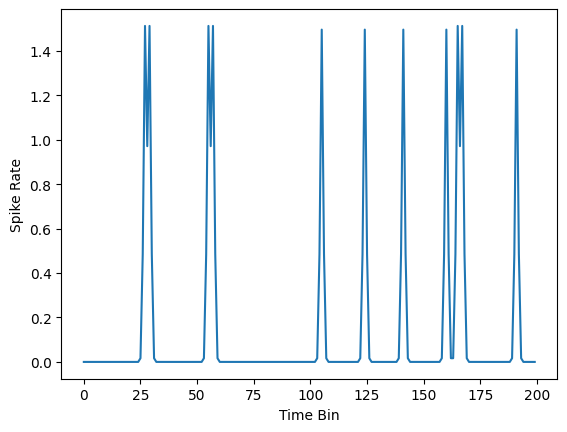

In [34]:
unique_params = d_data['unique_params']

spike_dict = d_data['spike_dict']
cluster_id = list(spike_dict.keys())

u_intensity = np.array(unique_params['spotIntensity'])
intensities = d_data['params']['spotIntensity']


cluster_plot = spike_dict[cluster_id[0]]
print(cluster_plot.shape)

# Making a PSTH 
psth = np.zeros((len(cluster_id),len(u_intensity),cluster_plot.shape[1]))

# 
count=0
for key, value in spike_dict.items():
    for i_count, intensity in enumerate(u_intensity):
        idx = np.argwhere(intensities == intensity).ravel()
        psth[count,i_count,:] = np.nanmean(value[idx,:],axis=0)
        count += 1


# plt.plot(cluster_plot);
plt.xlabel("Time Bin")
plt.ylabel("Spike Rate")

plt.plot(psth[0,0,:]);


